In [12]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
data.info()
data.describe()
unique_countries, countries_count = np.unique(data['Country'], return_counts=True)
print(unique_countries, countries_count)
#6 countries, 2000-2015

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] [16 16 16 16 16 16]


In [11]:
gdp_by_country = data.groupby('Country')['GDP'].sum()
print(gdp_by_country) 

avg_life_expectancy = data.groupby('Country')['Life expectancy at birth (years)'].mean()
print(avg_life_expectancy)


Country
Chile                       2.716622e+12
China                       7.932342e+13
Germany                     4.951641e+13
Mexico                      1.562641e+13
United States of America    2.252000e+14
Zimbabwe                    1.450013e+11
Name: GDP, dtype: float64
Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


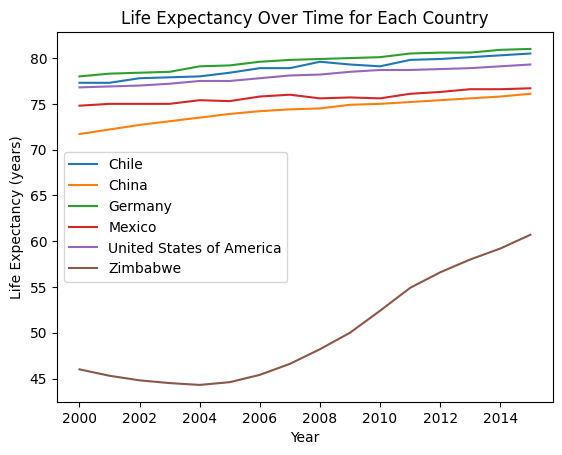

60.7


In [15]:
for country in unique_countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], label=country)
plt.title('Life Expectancy Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()  
plt.show()    

zimbabwe_2015 = data[(data['Country'] == 'Zimbabwe') & (data['Year'] == 2015)]
zimbabwe_2015_life_expectancy = zimbabwe_2015['Life expectancy at birth (years)'].values[0]
print(zimbabwe_2015_life_expectancy)

In [16]:
#We can see from the plot that life expectancy has increased over time for all nations.
#All countries except Zimbabwe had a steady increase in life expectancy.
#Zimbabwe started with a significantly low life expectantly and although it did grow considerably from 2007, in 2015 it was age 60. This is still much lower than the other 5 nations.

Correlation between GDP and life expectancy: 0.3432067484491559


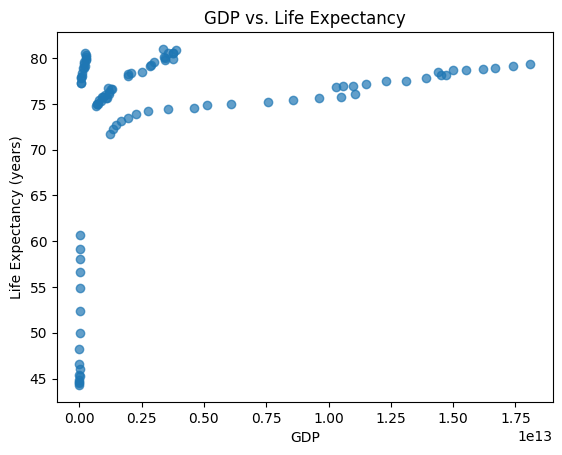

In [23]:
#Correlation to GDP and Life Expectancy?

correlation = data['GDP'].corr(data['Life expectancy at birth (years)'])
print(f"Correlation between GDP and life expectancy: {correlation}")
#Weak Positive Correlation, other factors besides GDP might be more significant in determining life expectancy.

plt.scatter(data['GDP'], data['Life expectancy at birth (years)'], alpha=0.7)
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.show()